In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pystokes
import pyforces

### Unbounded Stokeslet

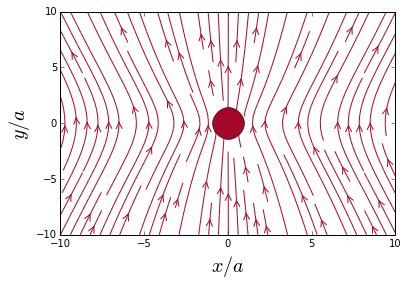

In [13]:
%matplotlib inline
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
F = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))
wall=2
r[0], r[1], r[2]= 0, 0, 0
F[0], F[1], F[2]= 0, 1, 0

####Instantiate the Flow class
uFlow = pystokes.unbounded.Flow(a, eta, Np, Nt)



vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
uFlow.stokesletV(vv, rt, r, F)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='#A60628', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, color="#A60628", density=1.2, arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L])
plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.show()

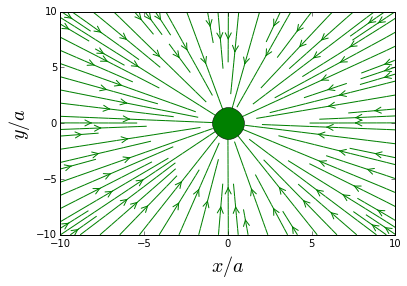

In [26]:
%matplotlib inline
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
F = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))
rt[2*Nt:3*Nt]=-4

r[0], r[1], r[2]= 0, 0, 0
F[0], F[1], F[2]= 0, 0, 1

####Instantiate the Flow class
uFlow = pystokes.unbounded.Flow(a, eta, Np, Nt)



vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
uFlow.stokesletV(vv, rt, r, F)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='g', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, density=1.2, arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L])
plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.show()

In [13]:
vx

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## Stresslet Flow

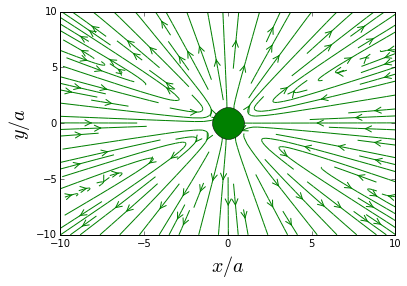

In [20]:
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
F = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

wall, S0 = 2, 1
r[0], r[1], r[2]= 0, 0, 0
p[0], p[1], p[2]= 0, 1, 0
F[0], F[1], F[2]= 0, 1, 0

for i in range(Np):
    S[i]      = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]  = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np]  = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
uFlow = pystokes.unbounded.Flow(a, eta, Np, Nt)

%matplotlib inline

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
uFlow.stressletV(vv, rt, r, S)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='g', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, density=1.2, arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L])
plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.show()

## PD Flow

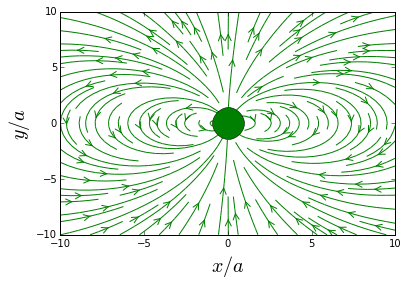

In [21]:
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
F = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

wall, S0 = 2, 1
r[0], r[1], r[2]= 0, 0, 0
p[0], p[1], p[2]= 0, 1, 0
F[0], F[1], F[2]= 0, 1, 0

for i in range(Np):
    S[i]      = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]  = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np]  = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])

####Instantiate the Flow class
uFlow = pystokes.unbounded.Flow(a, eta, Np, Nt)

%matplotlib inline

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
uFlow.potDipoleV(vv, rt, r, p)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='g', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, density=1.2, arrowstyle='->', arrowsize =1.5)
plt.xlim([-L, L])
plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.show()